<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import skopt
from skopt import Optimizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#?skopt.space.Categorical

In [3]:
def f(x, noise_level=0.05, random_state=123):
    #np.random.seed(random_state)
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

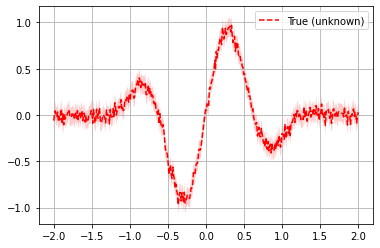

In [4]:
noise_level = 0.05

x = np.linspace(-2, 2, 400).reshape(-1, 1)

fx = [f(x_i, noise_level=noise_level) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")

plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")

plt.legend()
plt.grid()
plt.show()

In [5]:

opt = Optimizer([(-2.0, 2.0)])
y_vals = []
x_vals = []
for i in range(30):
    suggested = opt.ask()
    y = f(suggested)
    opt.tell(x=suggested, y=y)
    print('iteration:', i, 'x=',suggested, 'f(x)=', y)
    x_vals.append(suggested)
    y_vals.append(y)

iteration: 0 x= [-1.8514275620196767] f(x)= 0.025358919371648067
iteration: 1 x= [-0.8972205026012456] f(x)= 0.3656678151112175
iteration: 2 x= [-0.6829265357310834] f(x)= 0.23949661325272362
iteration: 3 x= [0.477941756338927] f(x)= 0.5425235874494695
iteration: 4 x= [-1.8482463097649813] f(x)= 0.008430149674719029
iteration: 5 x= [1.1863776132478536] f(x)= -0.06048022591301132
iteration: 6 x= [-1.173719694639655] f(x)= 0.013656777761285314
iteration: 7 x= [-1.7654183837809905] f(x)= 0.04082090385115501
iteration: 8 x= [-0.9633150105186157] f(x)= 0.22756305375535643
iteration: 9 x= [-1.9067579792509024] f(x)= 0.04238549666657475
iteration: 10 x= [1.416568556192885] f(x)= 0.06111591812147722
iteration: 11 x= [1.0464869528504472] f(x)= -0.202382088991619
iteration: 12 x= [1.0110822143661338] f(x)= -0.24368804217834245
iteration: 13 x= [0.9736227536526321] f(x)= -0.28093746729986535
iteration: 14 x= [0.939544993756142] f(x)= -0.3057631680827059
iteration: 15 x= [2.0] f(x)= 0.006492424858

In [6]:
x_vals[np.argmin(y_vals)]

[-0.2723217816932504]

In [7]:
opt.space

Space([Real(low=-2.0, high=2.0, prior='uniform', transform='normalize')])

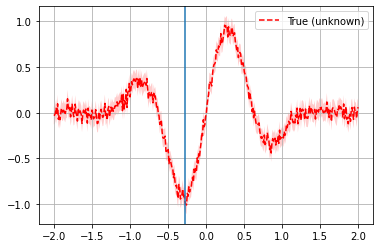

In [8]:
noise_level = 0.05

x = np.linspace(-2, 2, 400).reshape(-1, 1)

fx = [f(x_i, noise_level=noise_level) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
#plt.plot(x_vals[np.argmin(y_vals)],np.min(y_vals),"b--")

plt.axvline(x=x_vals[np.argmin(y_vals)])  # vertical line min value

plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")


plt.legend()
plt.grid()
plt.show()